# Map Projections and Dot Maps
Let's read in John Snow's cholera data.

In [1]:
import pandas as pd

directory = "https://datasci112.stanford.edu/data/cholera"
df_deaths = pd.read_csv(f"{directory}/deaths.csv")
df_deaths

Longitude   Latitude  Count
0    -0.137930  51.513418      3
1    -0.137883  51.513361      2
2    -0.137853  51.513317      1
3    -0.137812  51.513262      1
4    -0.137767  51.513204      4
..         ...        ...    ...
245  -0.137108  51.514526      3
246  -0.137065  51.514706      2
247  -0.138474  51.512311      1
248  -0.138123  51.511998      1
249  -0.137762  51.511856      1

[250 rows x 3 columns]

One way to visualize this data is to make a scatterplot of the deaths using latitude and longitude. This is a crude approximation.

<Axes: xlabel='Longitude', ylabel='Latitude'>

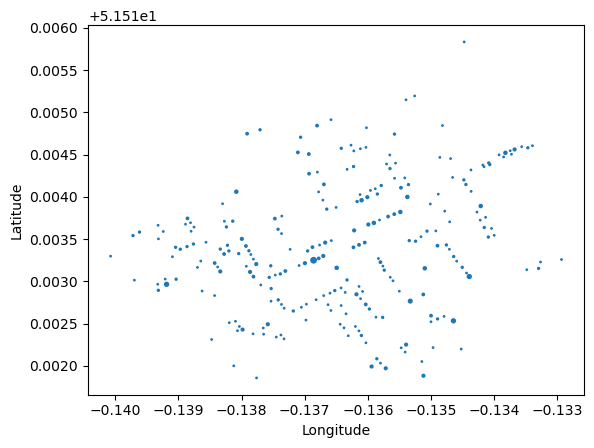

In [2]:
df_deaths.plot.scatter(x="Longitude", y="Latitude", s="Count")

# Map Projections
But we know that for geospatial data, we should use a proper map projection.

Geopandas is a Python library for reading and processing geospatial data. It provides a data structure called a GeoDataFrame, which is the analog of Pandas's DataFrame.

In [15]:
!pip install geopandas

In [16]:
import geopandas as gpd

The map projection is specified using a Coordinate Reference System (or CRS). Every projection has a CRS code. For example:

the Mercator projection has code EPSG:4326
the Robinson projection has code ESRI:53030
You can look up the code for different projections here.https://epsg.io/ 

In [17]:
gdf_deaths = gpd.GeoDataFrame(
    df_deaths,
    geometry=gpd.points_from_xy(
        x=df_deaths["Longitude"],
        y=df_deaths["Latitude"]
    ),
    crs="EPSG:4326"
)
gdf_deaths

Longitude   Latitude  Count                   geometry
0    -0.137930  51.513418      3  POINT (-0.13793 51.51342)
1    -0.137883  51.513361      2  POINT (-0.13788 51.51336)
2    -0.137853  51.513317      1  POINT (-0.13785 51.51332)
3    -0.137812  51.513262      1  POINT (-0.13781 51.51326)
4    -0.137767  51.513204      4   POINT (-0.13777 51.5132)
..         ...        ...    ...                        ...
245  -0.137108  51.514526      3  POINT (-0.13711 51.51453)
246  -0.137065  51.514706      2  POINT (-0.13706 51.51471)
247  -0.138474  51.512311      1  POINT (-0.13847 51.51231)
248  -0.138123  51.511998      1    POINT (-0.13812 51.512)
249  -0.137762  51.511856      1  POINT (-0.13776 51.51186)

[250 rows x 4 columns]

If we call .plot() on a GeoDataFrame, it automatically makes a map of the data.

<Axes: >

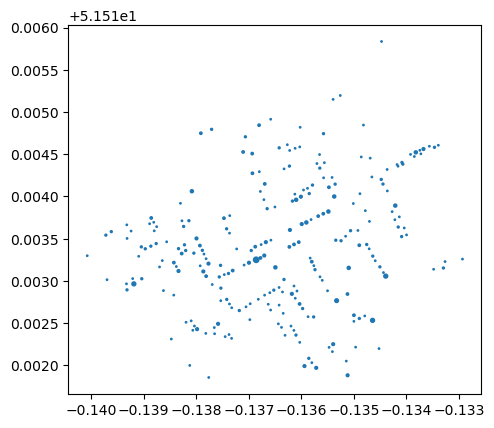

In [18]:
gdf_deaths.plot(markersize="Count")

We can change the CRS using .to_crs(). For example, to map the same data using the Robinson projection instead, would do the following.

<Axes: >

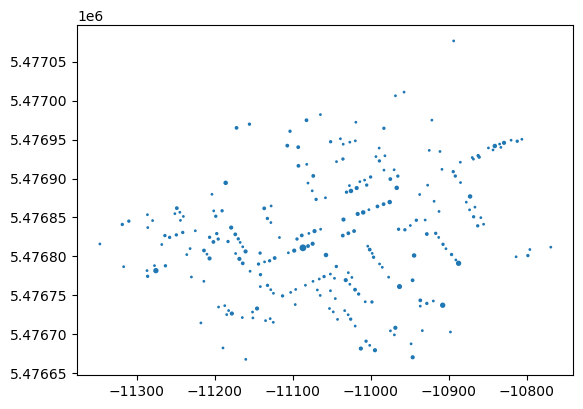

In [19]:
gdf_deaths.to_crs("ESRI:53030").plot(markersize="Count")

# Adding the Pumps
First, we read in the pumps data.

In [8]:
df_pumps = pd.read_csv(f"{directory}/pumps.csv")
df_pumps

Name  Longitude   Latitude
0               Broad St Pump  -0.136668  51.513341
1  Little Marlborough St Pump  -0.139586  51.513876
2       Marlborough Mews Pump  -0.139671  51.514906
3                Dean St Pump  -0.131630  51.512354
4              Rupert St Pump  -0.133594  51.512139
5              Bridle St Pump  -0.135919  51.511542
6           Tighborne St Pump  -0.133962  51.510019
7             Warwick St Pump  -0.138199  51.511295

We convert this to a GeoDataFrame as well.

In [20]:
gdf_pumps = gpd.GeoDataFrame(
    df_pumps,
    geometry=gpd.points_from_xy(
        x=df_pumps["Longitude"],
        y=df_pumps["Latitude"]
    ),
    crs="EPSG:4326"
)
gdf_pumps

Name  Longitude   Latitude                   geometry
0               Broad St Pump  -0.136668  51.513341  POINT (-0.13667 51.51334)
1  Little Marlborough St Pump  -0.139586  51.513876  POINT (-0.13959 51.51388)
2       Marlborough Mews Pump  -0.139671  51.514906  POINT (-0.13967 51.51491)
3                Dean St Pump  -0.131630  51.512354  POINT (-0.13163 51.51235)
4              Rupert St Pump  -0.133594  51.512139  POINT (-0.13359 51.51214)
5              Bridle St Pump  -0.135919  51.511542  POINT (-0.13592 51.51154)
6           Tighborne St Pump  -0.133962  51.510019  POINT (-0.13396 51.51002)
7             Warwick St Pump  -0.138199  51.511295    POINT (-0.1382 51.5113)

Now we display the deaths and pumps on the same map.

<Axes: >

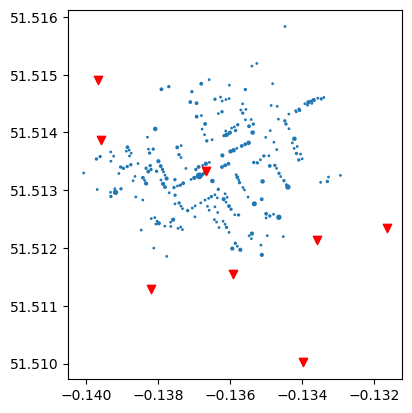

In [21]:
ax = gdf_deaths.plot(markersize="Count")
gdf_pumps.plot(ax=ax, color="red", marker="v")

# Adding a Background Map
We want to overlay these points on a map of London. To do this, we can use a library called contextily, which fetches web map tiles from OpenStreetMap.

In [22]:
!pip install contextily -q

In [23]:
import contextily as cx

OpenStreetMap uses a specific CRS called "Web Mercator", whose code is EPSG:3857. So we need to convert all of our data to this CRS.

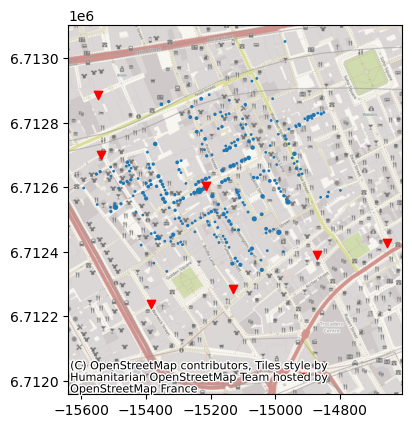

In [25]:
ax = gdf_deaths.to_crs("EPSG:3857").plot(markersize="Count")
gdf_pumps.to_crs("EPSG:3857").plot(ax=ax, color="red", marker="v")

# Add tiles from OpenStreetMap to map
cx.add_basemap(ax)